# Read in StatsBomb Open Data 

In [44]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pitch_plot import drawpitch

%matplotlib inline 

In [31]:
# read in info on available data

competitions_info_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json"

competitions_df = pd.DataFrame(requests.get(url=competitions_info_url).json())

competitions_df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [32]:
# select desired competition and season; get ids

selected_competition = "Champions League"

selected_season = "2004/2005"

competition_season_df = competitions_df[(competitions_df["competition_name"] == selected_competition)
                      & (competitions_df["season_name"] == selected_season)]

competition_id, season_id = competition_season_df.iloc[0][['competition_id','season_id']]

In [72]:
# get data on matches in given competition/season

matches_url = f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/{competition_id}/{season_id}.json"

matches_df = pd.DataFrame(requests.get(url=matches_url).json())

#TO FIX
# pull data out of json columns
for col in ['competition',
            'home_team',
            'away_team']:
    
    matches_df = pd.concat([matches_df, pd.json_normalize(matches_df[col])], axis=1, join='inner')

#match_date, 

In [73]:
matches_df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,home_team_gender,home_team_group,country.id,country.name,away_team_id,away_team_name,away_team_gender,away_team_group,country.id,country.name
0,2302764,2005-05-25,None,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 37, 'season_name': '2004/2005'}","{'home_team_id': 243, 'home_team_name': 'AC Mi...","{'away_team_id': 24, 'away_team_name': 'Liverp...",3,3,available,...,male,None,112,Italy,24,Liverpool,male,None,68,England


In [34]:
# select match to look at; get meta data
match_id = 2302764

#competition_id, season_id = competition_season_df.iloc[0][['competition_id','season_id']]

In [ ]:
# get event data

match_events_url = f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json"

match_events_df = pd.DataFrame(requests.get(url=match_events_url.format(match_id)).json())

In [35]:
match_events_df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,clearance,dribble,interception,ball_recovery,foul_committed,foul_won,substitution,50_50,block,miscontrol
0,32f29907-de00-4792-86e8-c23c65db8777,1,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 243, 'name': 'AC Milan'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,411beee8-ddac-4e5e-aeb2-7045aba3898c,2,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 243, 'name': 'AC Milan'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abecffa0-558f-4822-9ef4-b27a3e415695,3,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 243, 'name': 'AC Milan'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5d8641d4-081e-411b-b856-e01c06f2c197,4,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 243, 'name': 'AC Milan'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09046e92-8c49-4ca4-93d1-f2f2f16fde61,5,1,00:00:00.683,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 24, 'name': 'Liverpool'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# filter out just columns required to analyse passes

cols_to_use = ['index',
               'player',
               'type',
               'location',
               'pass']

events_df = match_events_df.copy()[cols_to_use]

events_df

,index,player,type,location,pass
0,1,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN
1,2,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN
2,3,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN
3,4,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN
4,5,"{'id': 19735, 'name': 'Milan Baroš'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 34391, 'name': 'Harry Kew..."
...,...,...,...,...,...
4643,4644,"{'id': 34390, 'name': 'Jerzy Dudek'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN
4644,4645,"{'id': 15280, 'name': 'Vladimir Smicer'}","{'id': 16, 'name': 'Shot'}","[108.1, 40.0]",NaN
4645,4646,"{'id': 34393, 'name': 'Nelson de Jesus da Silva'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN
4646,4647,NaN,"{'id': 34, 'name': 'Half End'}",NaN,NaN


In [37]:
# pull data out of json columns
for col in ['type','pass']:
    
    events_df = pd.concat([events_df, pd.json_normalize(events[col])], axis=1, join='inner')
    
events_df

,index,player,type,location,pass,id,name,length,angle,end_location,...,outswinging,technique.id,technique.name,deflected,aerial_won,miscommunication,through_ball,cut_back,no_touch,inswinging
0,1,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN,35,Starting XI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,"{'id': 35, 'name': 'Starting XI'}",NaN,NaN,35,Starting XI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN,18,Half Start,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,"{'id': 18, 'name': 'Half Start'}",NaN,NaN,18,Half Start,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"{'id': 19735, 'name': 'Milan Baroš'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 34391, 'name': 'Harry Kew...",30,Pass,1.334166,-2.914794,"[59.7, 39.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,4644,"{'id': 34390, 'name': 'Jerzy Dudek'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN,23,Goal Keeper,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4644,4645,"{'id': 15280, 'name': 'Vladimir Smicer'}","{'id': 16, 'name': 'Shot'}","[108.1, 40.0]",NaN,16,Shot,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4645,4646,"{'id': 34393, 'name': 'Nelson de Jesus da Silva'}","{'id': 23, 'name': 'Goal Keeper'}","[1.0, 40.0]",NaN,23,Goal Keeper,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4646,4647,NaN,"{'id': 34, 'name': 'Half End'}",NaN,NaN,34,Half End,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# check which columns we have now

list(events_df)

['index',
 'player',
 'type',
 'location',
 'pass',
 'id',
 'name',
 'length',
 'angle',
 'end_location',
 'recipient.id',
 'recipient.name',
 'height.id',
 'height.name',
 'type.id',
 'type.name',
 'body_part.id',
 'body_part.name',
 'outcome.id',
 'outcome.name',
 'cross',
 'assisted_shot_id',
 'goal_assist',
 'switch',
 'shot_assist',
 'outswinging',
 'technique.id',
 'technique.name',
 'deflected',
 'aerial_won',
 'miscommunication',
 'through_ball',
 'cut_back',
 'no_touch',
 'inswinging']

In [40]:
# filter to pass events
pass_events_df = events_df[events_df["name"] == "Pass"]

In [41]:
# expand location list columns to individual columns
for col in ['location','end_location']:
    pass_events_df[[f'{col}_x',f'{col}_y']] = pd.DataFrame(pass_events_df[col].to_list(), columns=[f'{col}_x',f'{col}_y'])

C:\Users\georg\AppData\Local\Temp\ipykernel_4980\1754679704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_events_df[[f'{col}_x',f'{col}_y']] = pd.DataFrame(pass_events_df[col].to_list(), columns=[f'{col}_x',f'{col}_y'])
C:\Users\georg\AppData\Local\Temp\ipykernel_4980\1754679704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_events_df[[f'{col}_x',f'{col}_y']] = pd.DataFrame(pass_events_df[col].to_list(), columns=[f'{col}_x',f'{col}_y'])
C:\Users\georg\AppData\Local\Temp\ipykernel_4980\1

In [42]:
pass_events_df

,index,player,type,location,pass,id,name,length,angle,end_location,...,aerial_won,miscommunication,through_ball,cut_back,no_touch,inswinging,location_x,location_y,end_location_x,end_location_y
4,5,"{'id': 19735, 'name': 'Milan Baroš'}","{'id': 30, 'name': 'Pass'}","[61.0, 40.1]","{'recipient': {'id': 34391, 'name': 'Harry Kew...",30,Pass,1.334166,-2.914794,"[59.7, 39.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,44.4,54.6,56.0,62.4
7,8,"{'id': 34391, 'name': 'Harry Kewell'}","{'id': 30, 'name': 'Pass'}","[59.4, 40.0]","{'recipient': {'id': 19109, 'name': 'Steven Ge...",30,Pass,6.624198,2.637427,"[53.6, 43.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,64.1,57.8,72.8,43.0
10,11,"{'id': 19109, 'name': 'Steven Gerrard'}","{'id': 30, 'name': 'Pass'}","[53.1, 43.9]","{'recipient': {'id': 34387, 'name': 'Djimi Tra...",30,Pass,32.916410,-1.831986,"[44.6, 12.1]",...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,40.1,53.6,39.1
13,14,"{'id': 34387, 'name': 'Djimi Traoré'}","{'id': 30, 'name': 'Pass'}","[44.6, 12.1]","{'recipient': {'id': 19735, 'name': 'Milan Bar...",30,Pass,33.863990,0.406831,"[75.7, 25.5]",...,NaN,NaN,NaN,NaN,NaN,NaN,35.9,13.1,34.4,33.7
15,16,"{'id': 19849, 'name': 'Andrea Pirlo'}","{'id': 30, 'name': 'Pass'}","[44.4, 54.6]","{'recipient': {'id': 26712, 'name': 'Ricardo I...",30,Pass,13.978555,0.591971,"[56.0, 62.4]",...,NaN,NaN,NaN,NaN,NaN,NaN,73.3,80.0,76.5,73.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,4594,"{'id': 19849, 'name': 'Andrea Pirlo'}","{'id': 30, 'name': 'Pass'}","[76.8, 39.3]","{'recipient': {'id': 15017, 'name': 'Rui Manue...",30,Pass,13.518136,1.518991,"[77.5, 52.8]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4608,4609,"{'id': 19109, 'name': 'Steven Gerrard'}","{'id': 30, 'name': 'Pass'}","[55.7, 54.9]","{'recipient': {'id': 34384, 'name': 'Djibril C...",30,Pass,44.211536,0.310306,"[97.8, 68.4]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4612,4613,"{'id': 34384, 'name': 'Djibril Cissé'}","{'id': 30, 'name': 'Pass'}","[98.5, 67.5]","{'recipient': {'id': 15280, 'name': 'Vladimir ...",30,Pass,12.517188,-1.796398,"[95.7, 55.3]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4617,4618,"{'id': 19109, 'name': 'Steven Gerrard'}","{'id': 30, 'name': 'Pass'}","[91.6, 53.4]","{'recipient': {'id': 18103, 'name': 'Dietmar H...",30,Pass,5.131277,0.577192,"[95.9, 56.2]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


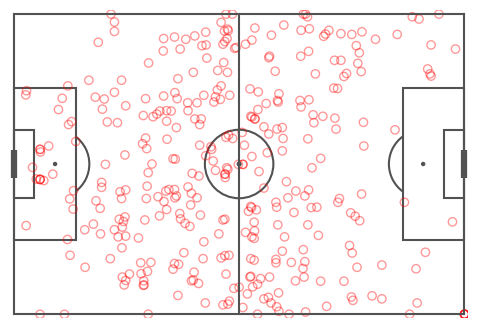

In [52]:
fig,ax = plt.subplots(figsize=(6,4)) 
plt.axis('off')
fig.patch.set_facecolor('white')

drawpitch(ax, hspan = [0, 120], vspan = [80,0],
            linecolor = '#232323', facecolor = '#e8e8e8', arcs = True, \
            lw = 1.5, x_offset = [1,1], y_offset = [-1,-1], style_id = 8,
            grass_cutting = False, measure='SBdata') 

plt.scatter(pass_events_df['location_x'],
            pass_events_df['location_y'],
            alpha=0.4,
            facecolor='none',
            edgecolor = "red",
            lw=1)

plt.title("")